# PREDICTION USING DECISION TREE ALGORITHM

In [1]:
# importing of neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import StratifiedShuffleSplit, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# loading data into pandas
df = pd.read_csv('Iris.csv', index_col='Id')
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
79,6.0,2.9,4.5,1.5,Iris-versicolor
69,6.2,2.2,4.5,1.5,Iris-versicolor
101,6.3,3.3,6.0,2.5,Iris-virginica
146,6.7,3.0,5.2,2.3,Iris-virginica
21,5.4,3.4,1.7,0.2,Iris-setosa


In [3]:
# converting the column label to lower case string
df.columns = df.columns.str.lower()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepallengthcm  150 non-null    float64
 1   sepalwidthcm   150 non-null    float64
 2   petallengthcm  150 non-null    float64
 3   petalwidthcm   150 non-null    float64
 4   species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
# checking to see if duplicate exist in the data
df.index.nunique()

150

In [6]:
# Descriptive analysis of inputs
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepallengthcm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepalwidthcm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petallengthcm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petalwidthcm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
# descriptive analysis of target
df.describe(include=np.object).T

,count,unique,top,freq
species,150,3,Iris-virginica,50


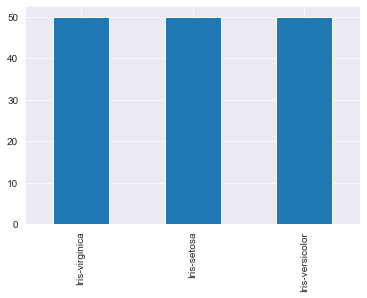

In [8]:
# Checking for data imbalance
df.species.value_counts().plot.bar();

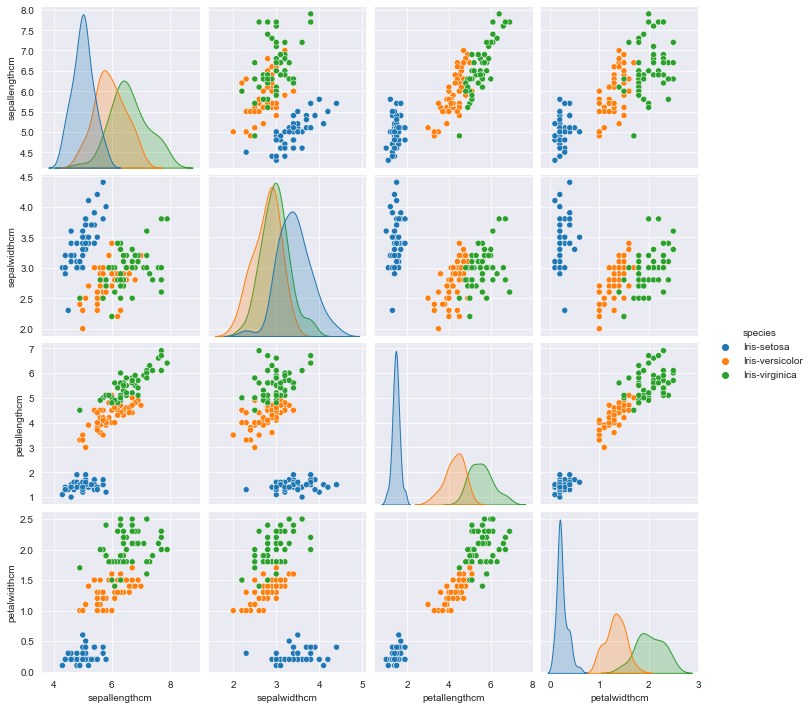

In [9]:
# checking it relationship exist between our inputs
sns.pairplot(data =df, hue = 'species');

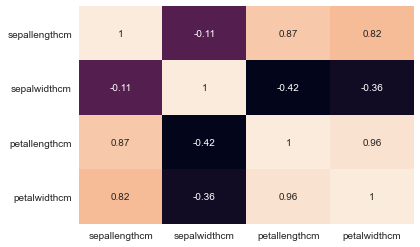

In [10]:
sns.heatmap(data= df.drop(columns = 'species').corr(), annot=True, cbar=False);

In [11]:
# splitting the data into input and target
X, y = df.drop(columns='species'), df['species']

In [20]:
# splitting the data into train and test data
splitter = StratifiedShuffleSplit(n_splits=15, test_size=0.4)
for train_index, test_index in splitter.split(X, y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [21]:
# creating and fitting our model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# running a prediction on the X test
y_pred = model_dt.predict(X_test)

In [23]:
# looking at different metrics
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.95      1.00      0.98        20

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



In [24]:
# further understanding the relationship between the predicted label and true label
pd.DataFrame(confusion_matrix(y_test, y_pred), index = df.species.unique(), columns= df.species.unique())

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,20,0,0
Iris-versicolor,0,19,1
Iris-virginica,0,0,20


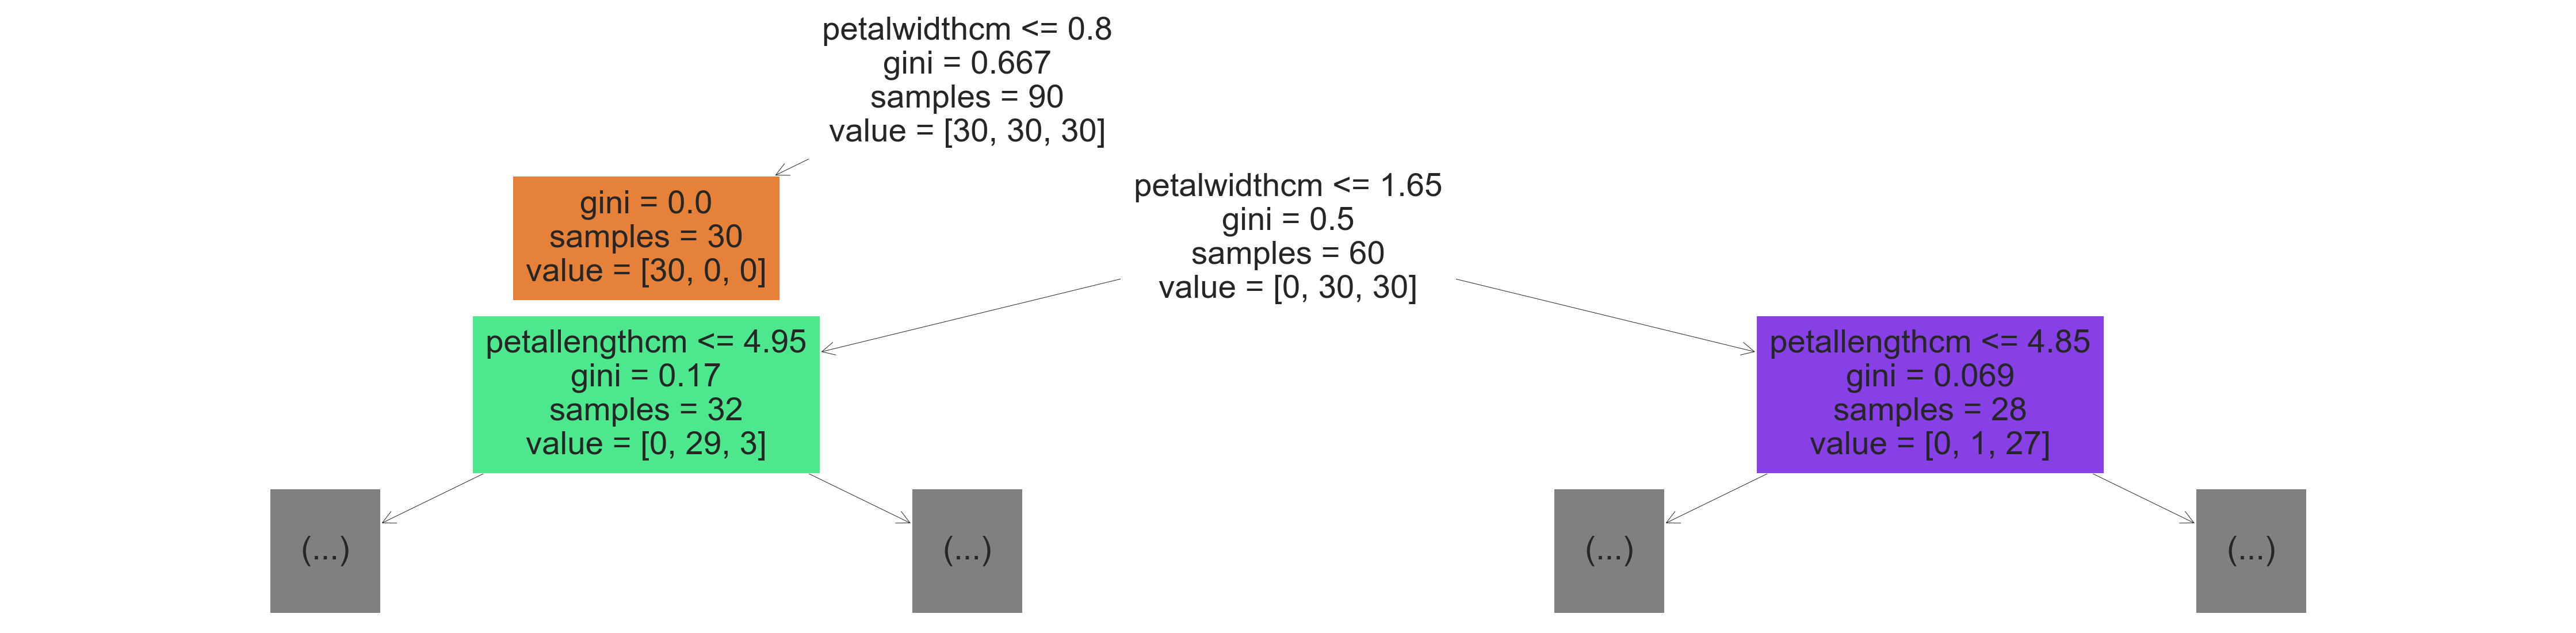

In [25]:
# classification basis of the model
plt.figure(figsize=(80,20))
plot_tree(model_dt, feature_names=X_train.columns, max_depth=2, filled=True);

In [18]:
# feature importances
impt = pd.DataFrame({'features': X_train.columns, 'importance':model_dt.feature_importances_}).sort_values(by = 'importance', ascending = False)
impt

,features,importance
2,petallengthcm,0.929575
3,petalwidthcm,0.028758
0,sepallengthcm,0.021338
1,sepalwidthcm,0.020328


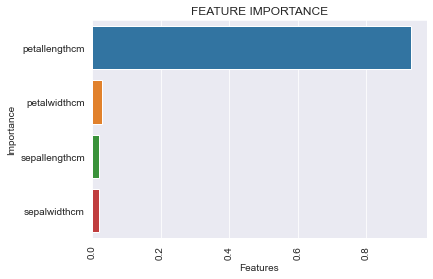

In [26]:
# Visualization of the feature importance
sns.barplot(data = impt, x = 'importance', y = 'features')
plt.xticks(rotation = 90);
plt.title('FEATURE IMPORTANCE')
plt.xlabel('Features')
plt.ylabel('Importance');